# **Final Poject "Supply Chain, Delivery Status Prediction"**

##### Author: Bela Devianti Retnoningsih

## **Import Libraries**

In [16]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [17]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from tabulate import tabulate

##### **Nowadays,** supply chain is an important part of human life. It's known that the products in your hand cannot be delivered safely without the supply chain. Without a supply chain, it's impossible to have products from another country or even another region. The supply chain comprises the process of produce a product, starting from preparing the raw material until selling. The supply chain is a network that involves every individual, organization, resource, activity, and technology in the product procurement process. The definition related to the supply chain is illustrated in the following figure.

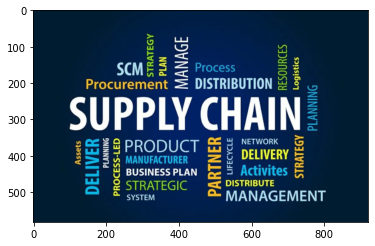

In [2]:
img = mpimg.imread('supply-chain.jpg')
imgplot = plt.imshow(img)
plt.show()

##### As a consumer, there is developed a curiosity about whether the supply chain has a dependency factor that is brought by the product, through data analysis, we will try to find the answer.

**Predict the status delivery of the product!**
###### To meet the answer, a dataset from kaggle is analyzed.
https://www.kaggle.com/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

## **What's inside the data?**

In [28]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
desc = pd.read_csv('desc.csv', encoding = 'unicode_escape')
desc

<ipython-input-28-7bdf76eb273f>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased product
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,": Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time"
6,Late_delivery_risk,": Categorical variable that indicates if sending is late (1), it is not late (0)."
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


## **Prepping Dataset**

### Import Dataset

In [30]:
dataset = pd.read_csv('DataCoSupplyChainDataset.csv', encoding = 'unicode_escape')

dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


### Find the shape of the data

In [4]:
dataset.shape

(180519, 53)

##### **Highlight:** The dataset has 180519 records in 53 columns

### Analytic of missing values

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
dataset.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


### Find the correlation between the data

<AxesSubplot:>

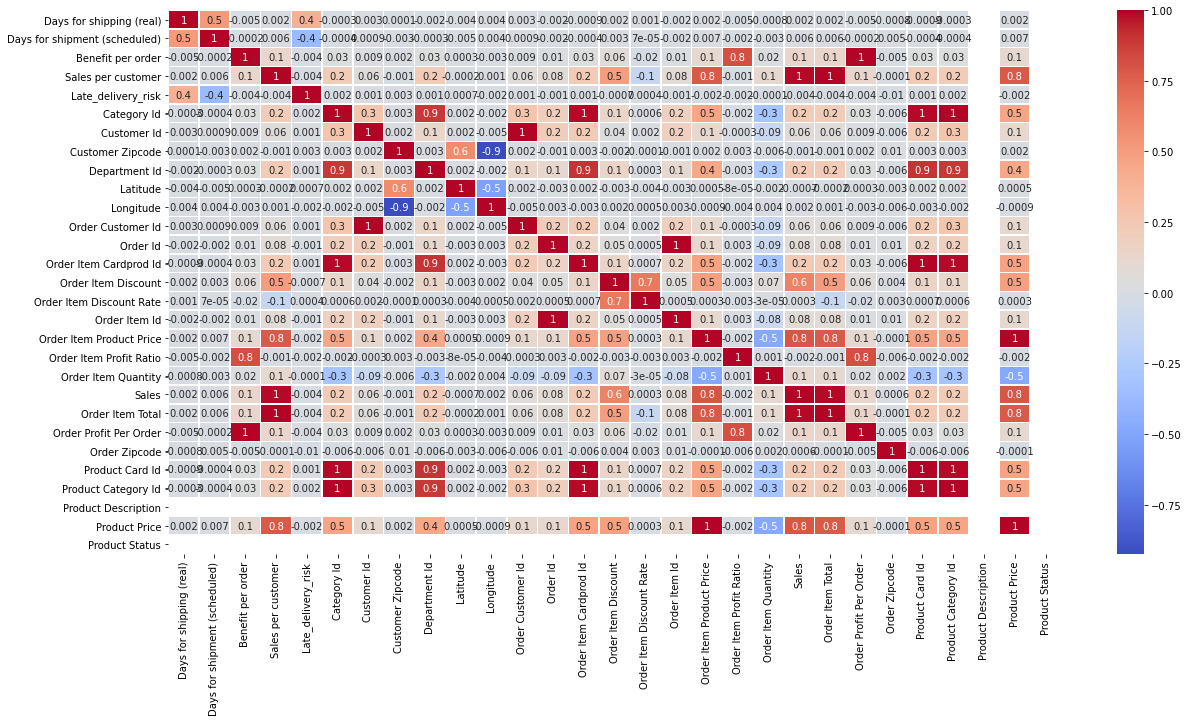

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm')

##### The data should be extracted before processing the missing value to the necessary data for the analysis. Furthermore, the data taken is only the related data to the supply chain.

In [31]:
df = dataset.drop(['Category Id','Customer Email','Customer Fname','Customer Lname','Customer Password','Customer Id',
              'Customer Street','Customer Zipcode','Department Name','Order Id','Order Item Discount Rate',
              'Order Item Id','Product Category Id','Product Image','Order Zipcode','Product Description',
              'Sales','Order Item Cardprod Id','shipping date (DateOrders)','Days for shipment (scheduled)','Department Id',
              'order date (DateOrders)','Customer City','Customer Country','Order Item Profit Ratio','Product Card Id',
              'Product Status','Latitude','Longitude','Days for shipping (real)','Order Status',
              'Sales per customer','Order Item Quantity','Order Customer Id','Order Item Product Price'],axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Type                    180519 non-null  object 
 1   Benefit per order       180519 non-null  float64
 2   Delivery Status         180519 non-null  object 
 3   Late_delivery_risk      180519 non-null  int64  
 4   Category Name           180519 non-null  object 
 5   Customer Segment        180519 non-null  object 
 6   Customer State          180519 non-null  object 
 7   Market                  180519 non-null  object 
 8   Order City              180519 non-null  object 
 9   Order Country           180519 non-null  object 
 10  Order Item Discount     180519 non-null  float64
 11  Order Item Total        180519 non-null  float64
 12  Order Profit Per Order  180519 non-null  float64
 13  Order Region            180519 non-null  object 
 14  Order State         

In [10]:
df.head()

,Type,Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer Segment,Customer State,Market,Order City,Order Country,Order Item Discount,Order Item Total,Order Profit Per Order,Order Region,Order State,Product Name,Product Price,Shipping Mode
0,DEBIT,91.250000,Advance shipping,0,Sporting Goods,Consumer,PR,Pacific Asia,Bekasi,Indonesia,13.110000,314.640015,91.250000,Southeast Asia,Java Occidental,Smart watch,327.75,Standard Class
1,TRANSFER,-249.089996,Late delivery,1,Sporting Goods,Consumer,PR,Pacific Asia,Bikaner,India,16.389999,311.359985,-249.089996,South Asia,Rajastán,Smart watch,327.75,Standard Class
2,CASH,-247.779999,Shipping on time,0,Sporting Goods,Consumer,CA,Pacific Asia,Bikaner,India,18.030001,309.720001,-247.779999,South Asia,Rajastán,Smart watch,327.75,Standard Class
3,DEBIT,22.860001,Advance shipping,0,Sporting Goods,Home Office,CA,Pacific Asia,Townsville,Australia,22.940001,304.809998,22.860001,Oceania,Queensland,Smart watch,327.75,Standard Class
4,PAYMENT,134.210007,Advance shipping,0,Sporting Goods,Corporate,PR,Pacific Asia,Townsville,Australia,29.500000,298.250000,134.210007,Oceania,Queensland,Smart watch,327.75,Standard Class


<AxesSubplot:>

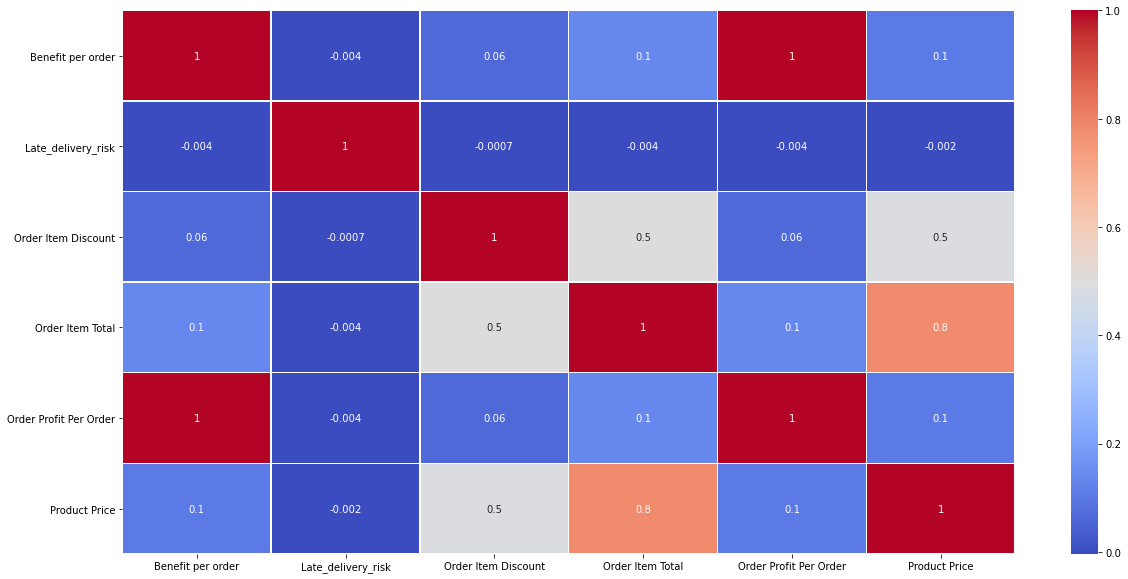

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm')

### Check the null values in necessary data

In [12]:
df.isnull().sum()

Type                      0
Benefit per order         0
Delivery Status           0
Late_delivery_risk        0
Category Name             0
Customer Segment          0
Customer State            0
Market                    0
Order City                0
Order Country             0
Order Item Discount       0
Order Item Total          0
Order Profit Per Order    0
Order Region              0
Order State               0
Product Name              0
Product Price             0
Shipping Mode             0
dtype: int64

<AxesSubplot:>

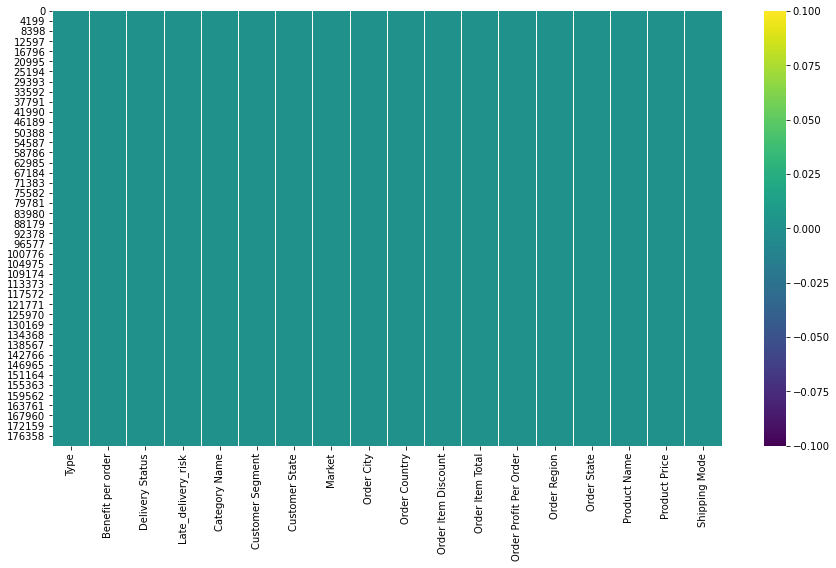

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),cmap='viridis')

##### **Highlight:** Fortunately the necessary data has no null value.

## **Data Visualization**

### Total Sales

<AxesSubplot:title={'center':'Total Sales by Regions'}, xlabel='Order Region'>

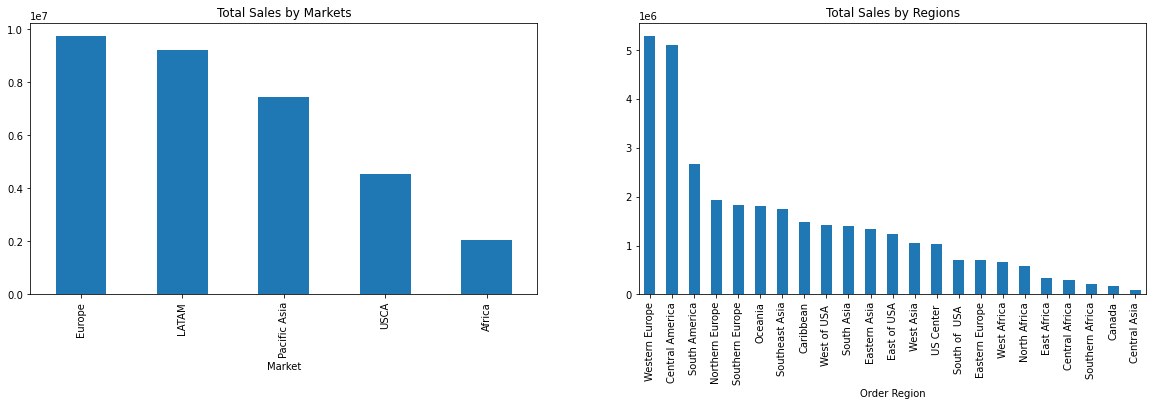

In [14]:
# Grouping the data to plotting
markets = df.groupby('Market') 
regions = df.groupby('Order Region')

plt.subplot(1,2,1)
markets['Order Item Total'].sum().sort_values(ascending=False).plot.bar(figsize=(20,5), title="Total Sales by Markets")
plt.subplot(1,2,2)
regions['Order Item Total'].sum().sort_values(ascending=False).plot.bar(figsize=(20,5), title="Total Sales by Regions")

##### **Highlight:** Europe is the top market with the highest sales. Meanwhile, Western Europe is the region with the highest sales.

### The Most Product Purchases and Give Highest Benefit per Category

<AxesSubplot:title={'center':'Benefit per Category'}, xlabel='Category Name'>

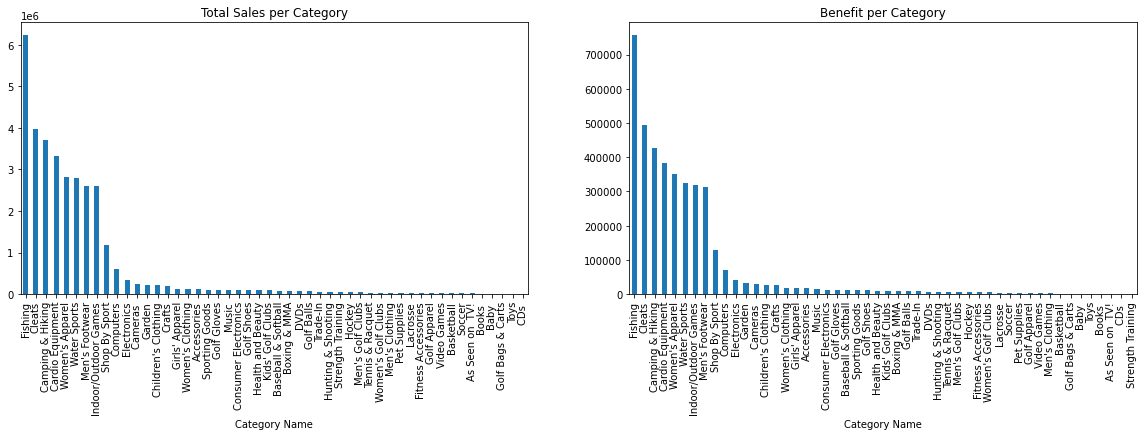

In [15]:
category = df.groupby('Category Name')
plt.subplot(1,2,1)
category['Order Item Total'].sum().sort_values(ascending=False).plot.bar(figsize=(20,5), title="Total Sales per Category")
plt.subplot(1,2,2)
category['Benefit per order'].sum().sort_values(ascending=False).plot.bar(figsize=(20,5), title="Benefit per Category")

##### **Highlight:** The question is related to each other, the most purchases product almost will give the highest benefit, in this case, the category match with the question is 'Fishing'.

### The Payment Method

<AxesSubplot:xlabel='Type', ylabel='count'>

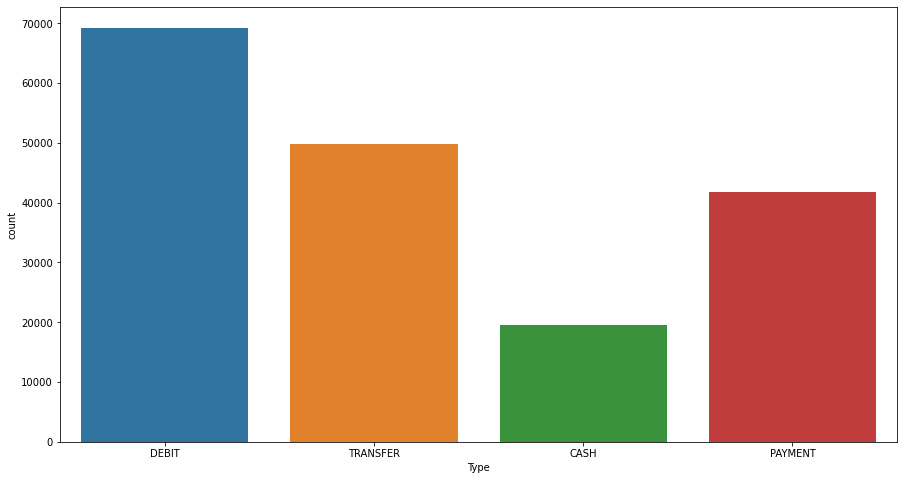

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(x='Type', data=df)

##### **Highlight:** The most common used payment method is debit.

### Delivery Status

<AxesSubplot:xlabel='Delivery Status', ylabel='count'>

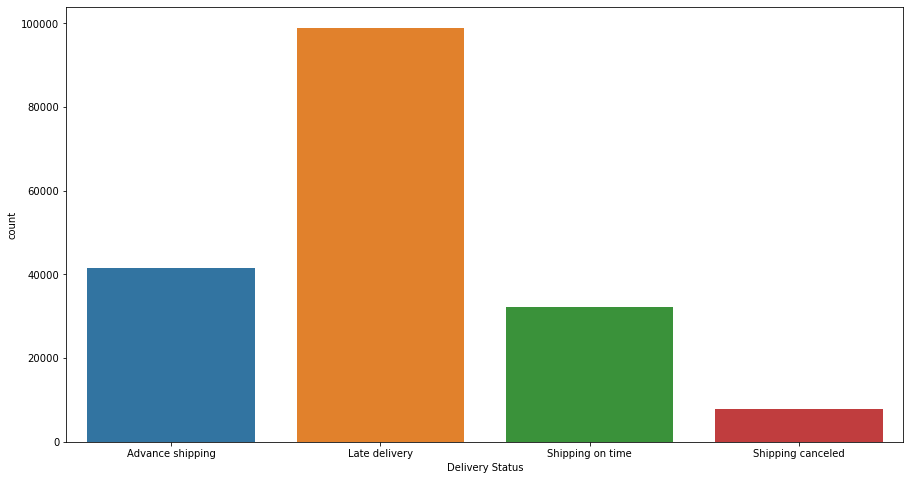

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(x='Delivery Status', data=df)

### Region wirh Its Status Delivery

<AxesSubplot:xlabel='Shipping Mode', ylabel='count'>

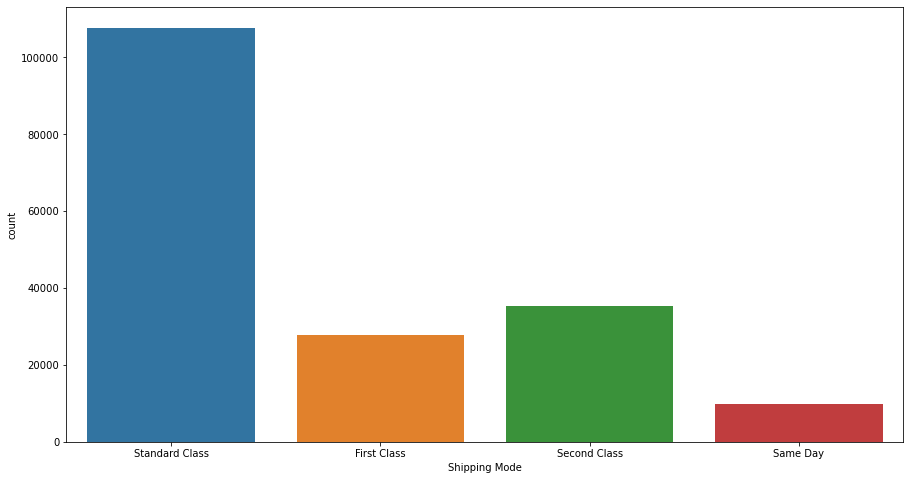

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(x='Shipping Mode', data=df)

<AxesSubplot:title={'center':"Rank of the Order Region for 'Shipping canceled'"}>

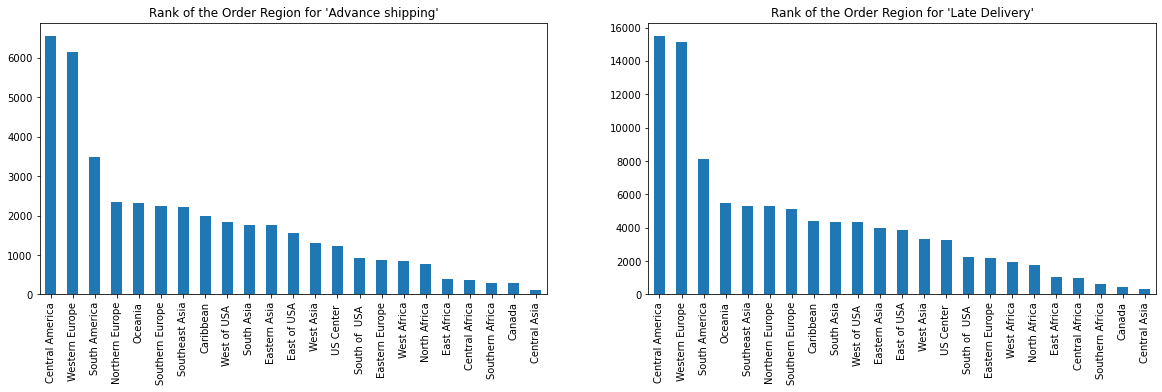

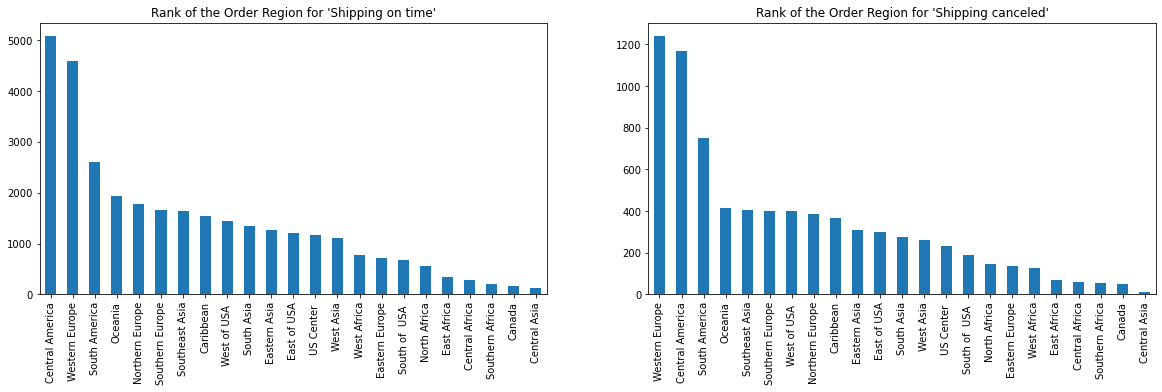

In [20]:
ds_1 = df[(df['Delivery Status'] == 'Advance shipping')]
ds_2 = df[(df['Delivery Status'] == 'Late delivery')]
ds_3 = df[(df['Delivery Status'] == 'Shipping on time')]
ds_4 = df[(df['Delivery Status'] == 'Shipping canceled')]

plt.figure(1)
plt.subplot(1,2,1)
ds_1['Order Region'].value_counts().plot.bar(figsize=(20,5), title="Rank of the Order Region for 'Advance shipping'")
plt.subplot(1,2,2)
ds_2['Order Region'].value_counts().plot.bar(figsize=(20,5), title="Rank of the Order Region for 'Late Delivery'")

plt.figure(2)
plt.subplot(1,2,1)
ds_3['Order Region'].value_counts().plot.bar(figsize=(20,5), title="Rank of the Order Region for 'Shipping on time'")
plt.subplot(1,2,2)
ds_4['Order Region'].value_counts().plot.bar(figsize=(20,5), title="Rank of the Order Region for 'Shipping canceled'")

##### **Highlight:** Central America hass dominated the delivery status in each category except for the 'Shipping canceled' which is Western Europe has the highest number.

## **Model Prediction**

### Convert string into numeric using LabelEncoder

In [21]:
cat =['Type','Late_delivery_risk','Category Name','Customer Segment',
'Customer State','Market','Order City','Order Country',
'Order Region','Order State','Product Name','Shipping Mode']

for col in cat:
    df[col] = df[col].astype('category')
    
le = LabelEncoder()

for cols in df:
    df[cols] = le.fit_transform(df[cols])

### Divide the Data to Training and Testing

In [22]:
x = df.drop('Delivery Status',1) # independent variable
y = df['Delivery Status'] # dependet variable

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=13)

### Logistic Regression Classification

In [24]:
model_reg = LogisticRegression(solver='liblinear')

In [25]:
model_reg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [26]:
model_reg.score(x_train, y_train)

0.8379114139423723

##### **Predict the testing data**

In [27]:
reg_pred = model_reg.predict(x_test)

##### **Check the accuracy**

In [28]:
acc_model_reg = accuracy_score(y_test, reg_pred)

acc_model_reg

0.8367124602998744

##### **Report**

In [29]:
print(classification_report(y_test, reg_pred))

              precision    recall  f1-score   support

           0       0.62      0.94      0.75     12528
           1       1.00      1.00      1.00     29683
           2       0.57      0.12      0.20      2340
           3       0.71      0.37      0.48      9605

    accuracy                           0.84     54156
   macro avg       0.73      0.61      0.61     54156
weighted avg       0.84      0.84      0.82     54156



### K-Nearet Neighbors

In [30]:
model_knn = KNeighborsClassifier(n_neighbors=88)

In [31]:
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=88)

##### **Predict the testing data**

In [32]:
knn_pred = model_reg.predict(x_test) 

##### **Check the accuracy**

In [33]:
acc_model_knn = accuracy_score(y_test, knn_pred)

acc_model_knn

0.8367124602998744

##### **Search the best k-value**

In [34]:
error = []

for i in range(40, 100):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train, y_train)
    pred_i = model_knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
print(error)

[0.45560972006795186, 0.4553327424477436, 0.4552404165743408, 0.4548157175566881, 0.45459413546052146, 0.4542617623162715, 0.45420636679222987, 0.45372627225053547, 0.45343082945564667, 0.4535231553290494, 0.45357855085309107, 0.4534862249796883, 0.4533938991062855, 0.45322771253416055, 0.45320924735948004, 0.4530061304379939, 0.45311692148607724, 0.45295073491395227, 0.45296920008863284, 0.45265529211906347, 0.45254450107098015, 0.45243371002289684, 0.4523967796735357, 0.4524706403722579, 0.4523229189748135, 0.45245217519757736, 0.4522859886254524, 0.4523229189748135, 0.4522305931014107, 0.45217519757736907, 0.4521198020533274, 0.4521198020533274, 0.4520828717039663, 0.45206440652928576, 0.4519905458305636, 0.45206440652928576, 0.4520090110052441, 0.4521198020533274, 0.45204594135460524, 0.451972080655883, 0.4520090110052441, 0.45202747617992467, 0.45202747617992467, 0.45202747617992467, 0.4519905458305636, 0.45195361548120244, 0.4520090110052441, 0.4519905458305636, 0.451972080655883

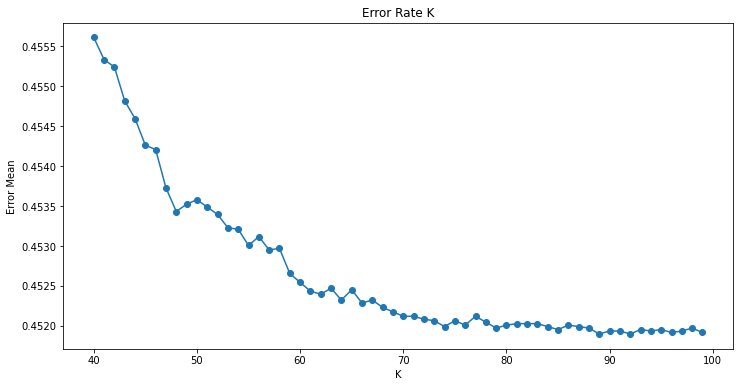

In [35]:
plt.figure(figsize=(12, 6))

plt.plot(range(40, 100),
         error,
         marker='o')

plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error Mean')

plt.show()

##### **Highlight:** The best k-value is near 100

##### **Report**

In [36]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.62      0.94      0.75     12528
           1       1.00      1.00      1.00     29683
           2       0.57      0.12      0.20      2340
           3       0.71      0.37      0.48      9605

    accuracy                           0.84     54156
   macro avg       0.73      0.61      0.61     54156
weighted avg       0.84      0.84      0.82     54156



### Naive Bayes

In [37]:
model_gnb = GaussianNB()

In [38]:
model_gnb.fit(x_train, y_train)

GaussianNB()

##### **Predict the testing data**

In [39]:
gnb_pred = model_gnb.predict(x_test)

##### **Check the accuracy**

In [40]:
acc_model_gnb = metrics.accuracy_score(y_test, gnb_pred)

acc_model_gnb

0.844855602333998

##### **Report**

In [41]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77     12528
           1       1.00      1.00      1.00     29683
           2       0.52      0.40      0.45      2340
           3       1.00      0.27      0.43      9605

    accuracy                           0.84     54156
   macro avg       0.79      0.67      0.66     54156
weighted avg       0.89      0.84      0.82     54156



### Decision Tree

In [42]:
model_dtc = DecisionTreeClassifier()

In [43]:
model_dtc.fit(x_train, y_train)

DecisionTreeClassifier()

##### **Predict the testing data**

In [44]:
dtc_pred = model_dtc.predict(x_test)

##### **Check the accuracy**

In [45]:
acc_model_dtc = accuracy_score(y_test, dtc_pred)

acc_model_dtc

0.8551961001551075

##### **Report**

In [46]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72     12528
           1       1.00      1.00      1.00     29683
           2       0.62      0.61      0.62      2340
           3       0.64      0.66      0.65      9605

    accuracy                           0.86     54156
   macro avg       0.75      0.74      0.75     54156
weighted avg       0.86      0.86      0.86     54156



### Random Forest

In [47]:
model_rf = RandomForestClassifier(n_estimators=100)

In [48]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

##### **Predict the testing data**

In [49]:
rf_pred = model_rf.predict(x_test)

##### **Check the accuracy**

In [50]:
acc_model_rf = accuracy_score(y_test, rf_pred)

acc_model_rf

0.8637085456828422

##### **Analyze the importance feature in this analysis**

In [51]:
model_rf.feature_importances_

array([0.02518018, 0.0346851 , 0.54778413, 0.01321368, 0.01073672,
       0.02368686, 0.00824748, 0.03667913, 0.0196148 , 0.03150103,
       0.03237966, 0.03479798, 0.01492667, 0.03030402, 0.0140689 ,
       0.01321181, 0.10898185])

In [52]:
feature_imp = pd.Series(model_rf.feature_importances_,
                        index=x.columns).sort_values(ascending=False)

<AxesSubplot:>

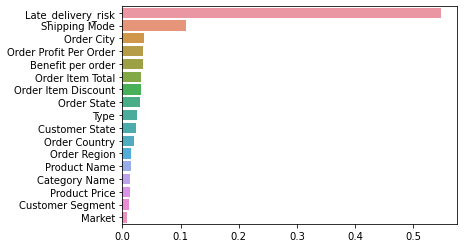

In [53]:
sns.barplot(x=feature_imp,
           y=feature_imp.index)

##### **Highlight:** From the analysis, the 'Late_delivery_risk' feature has the highest correlation in this analysis.

##### **Report**

In [54]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78     12528
           1       1.00      1.00      1.00     29683
           2       0.77      0.37      0.50      2340
           3       0.82      0.45      0.58      9605

    accuracy                           0.86     54156
   macro avg       0.81      0.69      0.71     54156
weighted avg       0.88      0.86      0.85     54156



### Support Vector Machine

In [55]:
model_svm = svm.SVC()

In [56]:
model_svm.fit(x_train, y_train)

SVC()

##### **Predict the testing data**

In [57]:
svm_pred = model_svm.predict(x_test)

##### **Check the accuracy**

In [62]:
acc_model_svm = accuracy_score(y_test, svm_pred)

acc_model_svm

0.5481017800428392

In [59]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12528
           1       0.55      1.00      0.71     29683
           2       0.00      0.00      0.00      2340
           3       0.00      0.00      0.00      9605

    accuracy                           0.55     54156
   macro avg       0.14      0.25      0.18     54156
weighted avg       0.30      0.55      0.39     54156



C:\Users\Bela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Summary

In [71]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════════════════════╤════════════╕
│ Model                              │   Accuracy │
╞════════════════════════════════════╪════════════╡
│ Logistic Regression Classification │   0.836712 │
├────────────────────────────────────┼────────────┤
│ K-Nearest Neighbor                 │   0.836712 │
├────────────────────────────────────┼────────────┤
│ Naive Bayes                        │   0.844856 │
├────────────────────────────────────┼────────────┤
│ Decision Tree                      │   0.855196 │
├────────────────────────────────────┼────────────┤
│ Random Forest                      │   0.863709 │
├────────────────────────────────────┼────────────┤
│ Support Vector Machine             │   0.548102 │
╘════════════════════════════════════╧════════════╛


### The best model to predict the status delivery in this supply chain data is Random Forest Model. This model give the best accurate prediction about 86,3709%.